In [1]:
import numpy as np
import pymc3 as pm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# コード例：二項分布のパラメータ推論

In [2]:
# 試行回数の想定
N_a = 1000
N_b = 100
# 成功回数
y_a = 10
y_b = 3

## モデルの設定

In [3]:
n_sample = 10000
with pm.Model() as model_a:
    # prior
    theta = pm.Beta('theta', alpha=1, beta=1)
    # Likelihood
    y = pm.Binomial('y', n=N_a, p=theta, observed=y_a)

In [4]:
with pm.Model() as model_b:
    # prior
    theta = pm.Beta('theta', alpha=1, beta=1)
    # Likelihood
    y = pm.Binomial('y', n=N_b, p=theta, observed=y_b)

## サンプルの実行

In [5]:
with model_a:
    trace_a = pm.sample(n_sample, chains=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [theta]
Sampling 3 chains: 100%|██████████| 31500/31500 [00:05<00:00, 5972.31draws/s]
The acceptance probability does not match the target. It is 0.8925765511244599, but should be close to 0.8. Try to increase the number of tuning steps.


In [6]:
with model_b:
    trace_b = pm.sample(n_sample, chains=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [theta]
Sampling 3 chains: 100%|██████████| 31500/31500 [00:05<00:00, 5572.38draws/s]


## 可視化

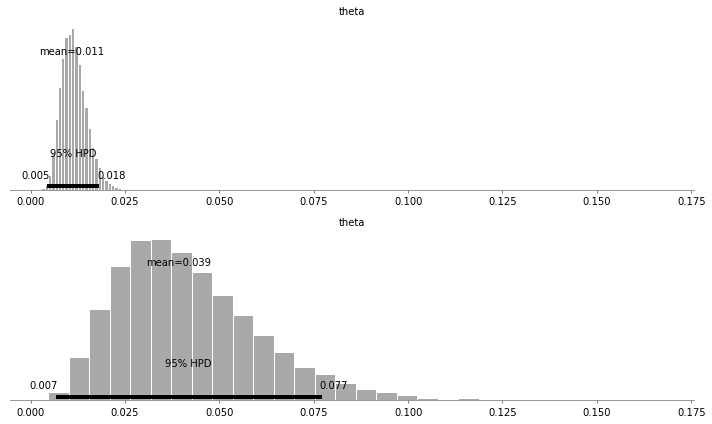

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots(2,1, sharex=True)
pm.plot_posterior(trace_a, ax=ax[0], color='#A9A9A9')
pm.plot_posterior(trace_b, ax=ax[1], color='#A9A9A9')